## CSE 574 Planing and Learning Methods in AI (Fall 2023)

# Assignment 1: Part 2

## Multi-Objective Bayesian Optimization

### 1. Getting to know software libraries

In [2]:
# Install BoTorch
!pip install botorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 567.8/567.8 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 732.8/732.8 kB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.1/266.1 kB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.5/174.5 kB 20.3 MB/s eta 0:00:00


In [11]:
# Import functions that you might need to use
import numpy as np
import matplotlib.pyplot as plt
import torch
from botorch.models import SingleTaskGP, ModelListGP
from gpytorch.mlls.sum_marginal_log_likelihood import SumMarginalLogLikelihood
from botorch import fit_gpytorch_model
from botorch.optim.optimize import optimize_acqf
from botorch.utils.transforms import unnormalize, normalize
from botorch.acquisition.multi_objective.monte_carlo import qExpectedHypervolumeImprovement
from botorch.utils.multi_objective.box_decompositions.non_dominated import NondominatedPartitioning
from botorch.sampling.normal import SobolQMCNormalSampler
import warnings
warnings.filterwarnings("ignore")

In this assignment, we minimize two objective functions using Bayesian Optimization.

The first objective function $f_1$ is the neural network with weights loaded from "net_f1.pth".

The second objective function $f_2$ is the neural network with weights loaded from "net_f2.pth".

You should perform the optimization with respect to $x$ within the range of $[-1,1]$.

In [8]:
# Declare the bound and define the functions of f1 and f2. You can use f1 and f2 defined below.
import torch.nn as nn
class Approximator(nn.Module):
    def __init__(self):
        super(Approximator, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(1, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Linear(128, 1)
        )

    def forward(self, x):
        return self.fc(x)

net_f1 = Approximator()
net_f2 = Approximator()
net_f1 = torch.load('net_f1.pth', map_location=torch.device('cpu'))
net_f2 = torch.load('net_f2.pth', map_location=torch.device('cpu'))

def f1(x):
    y = net_f1(torch.FloatTensor(x)).item()
    return y

def f2(x):
    y = net_f2(torch.FloatTensor(x)).item()
    return y


### 2. Examining the black box functions

In [13]:
# Plot f1 and f2 in the same figure.
# Below is what the figure will look like.

bounds = torch.tensor([-1, 1])
xs = np.linspace(bounds[0], bounds[1], 1000)
xs = xs.reshape((1000, -1))
# COMPLETE
plt.show()

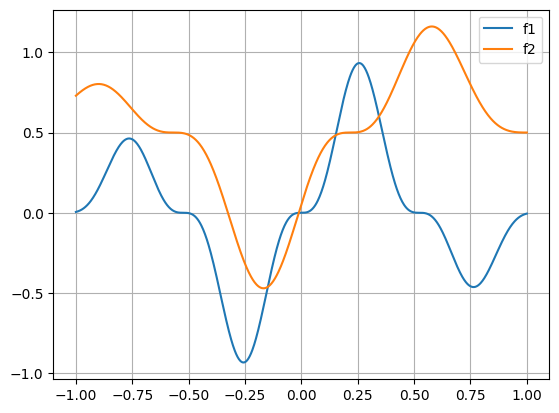

### 3. Setting up the Gaussian process and acquisition function

In [ ]:
# Define a function as the main Bayesian Optimization loop of the multi-objective Bayesian Optimization.
# The input of the function: All x along with their observatioons from two objective functions.
# The output of the function: The next candidate x.

# generate_next_candidate(x, y):
#    Step 1. Define the Gaussian Process model for each objective, and maximize their Marginal Log Likelihood.
#    Step 2. Construct the multi-objective acquisition function (You can use qExpectedHypervolumeImprovement here.)
#    Step 3. Optimize the acquisition to find the next candidate x.
# return candidate

def initialize_model(train_x, train_y):

    train_x = normalize(train_x, bounds)
    models = []
    for i in range(train_y.shape[-1]):
        train_objective = train_y[:, i]
        models.append(
            x_gp = #COMPLETE
            y_gp = #COMPLETE
            SingleTaskGP(x_gp, y_gp)
        )
    model = ModelListGP(*models)
    return model

def generate_next_candidate(x, y):
    # Define and initialize the GP model
    model = initialize_model(x, y)
    mll = SumMarginalLogLikelihood( , ) # COMPLETE - Pass the correct arguments into this function

    fit_gpytorch_model() # COMPLETE - Pass the correct argument/s into this function

    sampler = SobolQMCNormalSampler(sample_shape=torch.Size([256]))

    train_x = normalize(x, bounds)

    partitioning = NondominatedPartitioning(ref_point=torch.FloatTensor([-1, -1]), Y=y)
    acq_fun = qExpectedHypervolumeImprovement(
        model = #COMPLETE
        ref_point = #COMPLETE
        partitioning = #COMPLETE
        sampler = #COMPLETE
    )

    candidates, _ = optimize_acqf(
        acq_function = #COMPLETE,
        bounds = #COMPLETE
        q=1,
        num_restarts=20,
        raw_samples=1024,
    )
    candidates = unnormalize(candidates, bounds)
    return candidates

### 4. Running Bayesian optimization

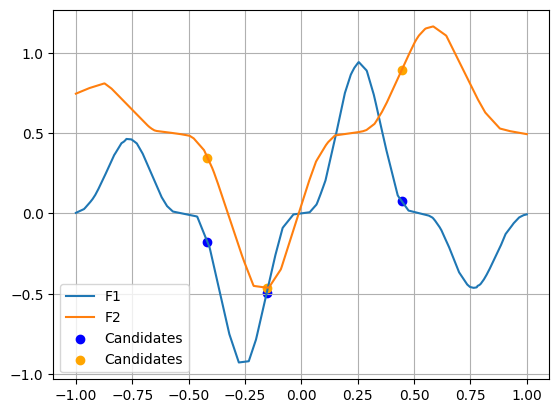

Iteration 0
Candidates: tensor([[-1.]])


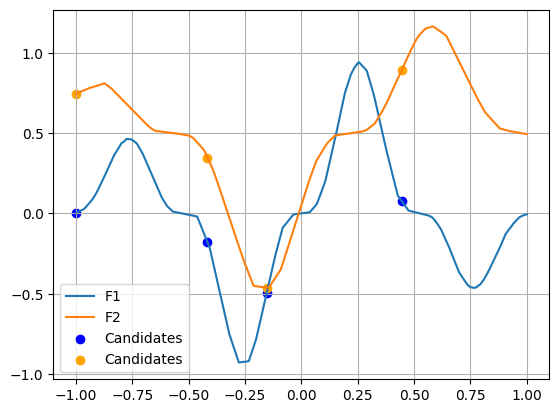

Iteration 1
Candidates: tensor([[-0.0600]])


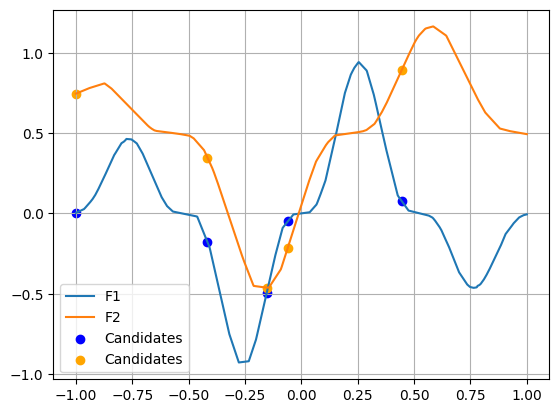

Iteration 2
Candidates: tensor([[1.]])


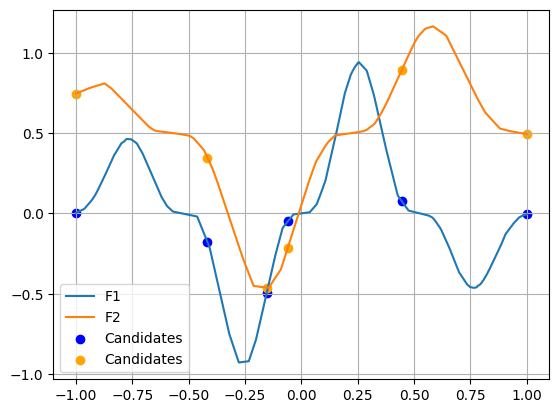

Iteration 3
Candidates: tensor([[-0.1701]])


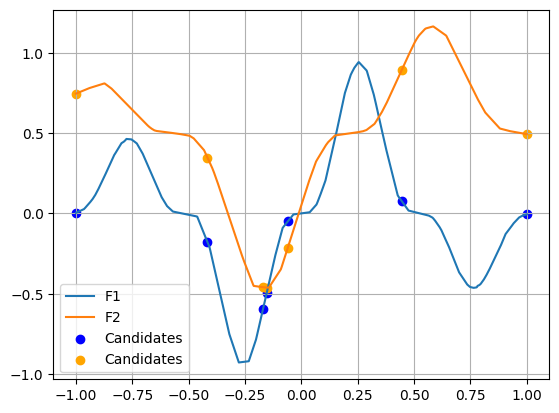

Iteration 4
Candidates: tensor([[-0.1839]])


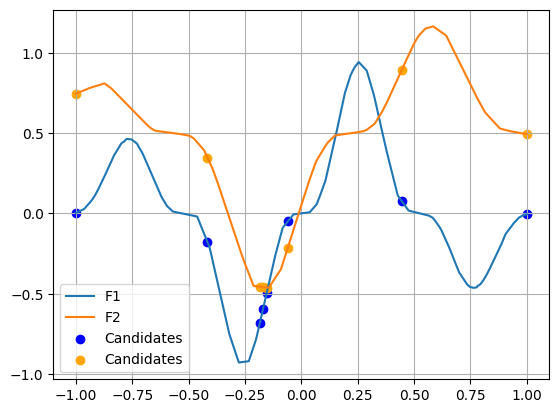

Iteration 5
Candidates: tensor([[-0.1668]])


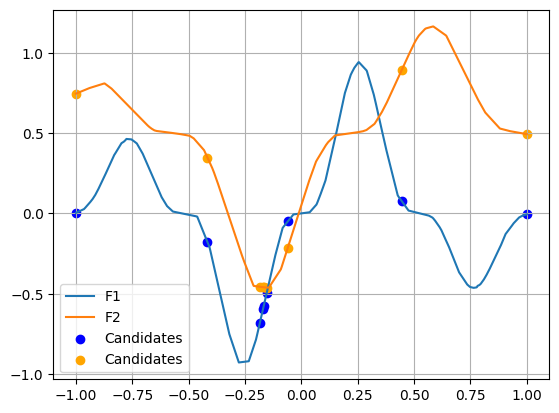

Iteration 6
Candidates: tensor([[-0.2470]])


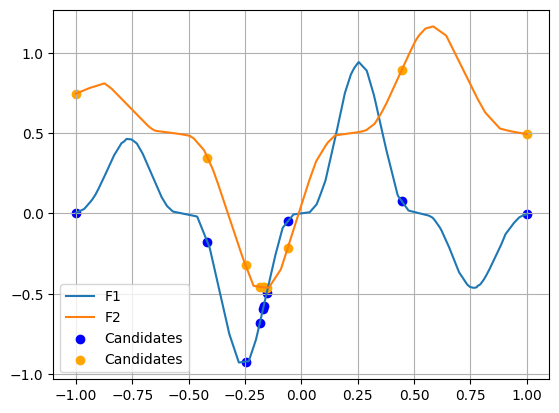

Iteration 7
Candidates: tensor([[-0.2671]])


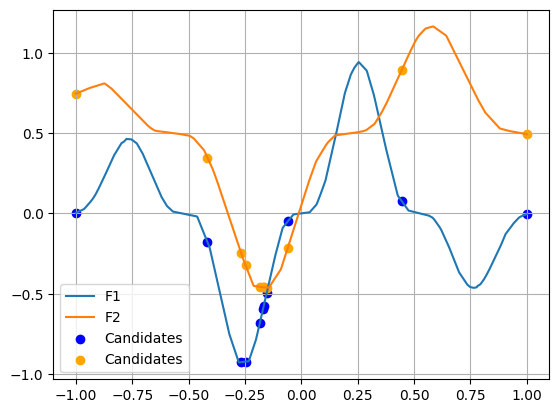

Iteration 8
Candidates: tensor([[-0.2154]])


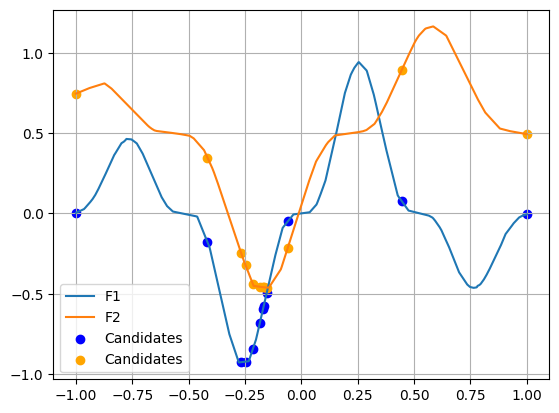

Iteration 9
Candidates: tensor([[-0.1769]])


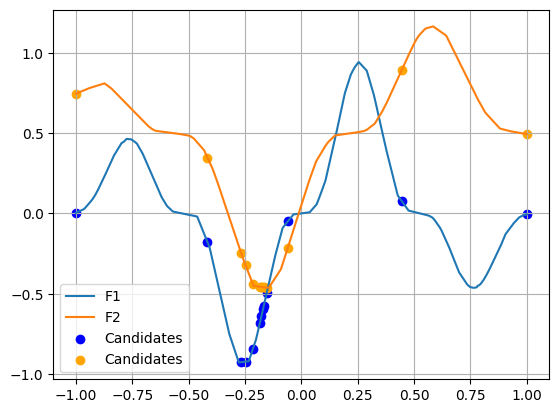

Iteration 10
Candidates: tensor([[-0.2579]])


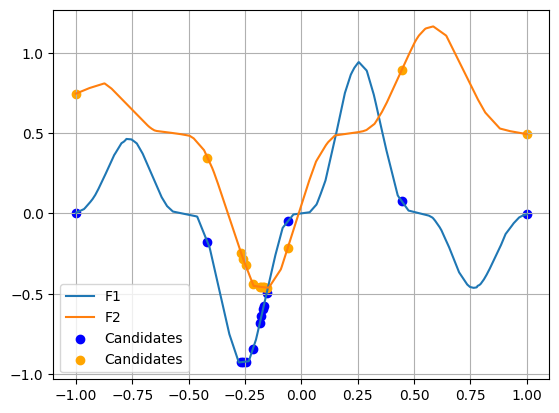

Iteration 11
Candidates: tensor([[0.7450]])


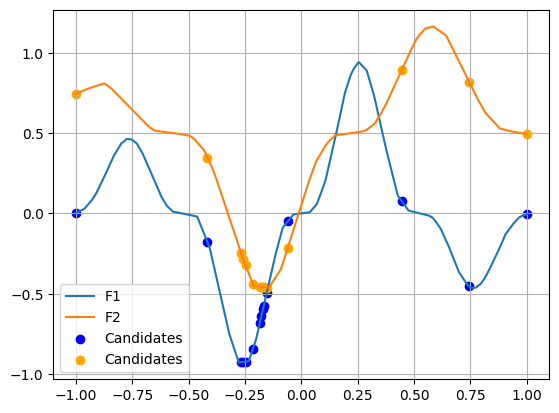

Iteration 12
Candidates: tensor([[-0.1757]])


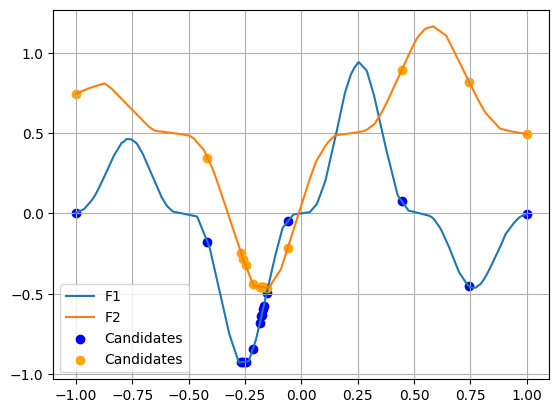

Iteration 13
Candidates: tensor([[-0.2581]])


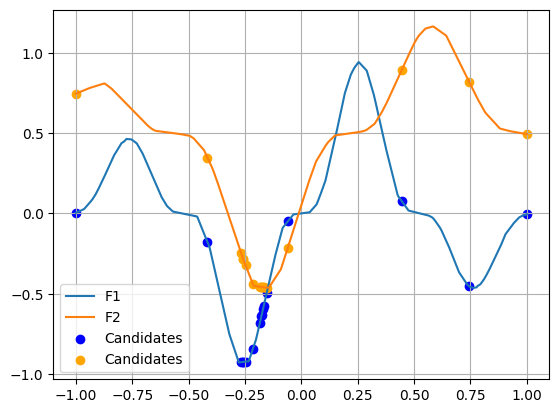

Iteration 14
Candidates: tensor([[-0.1759]])


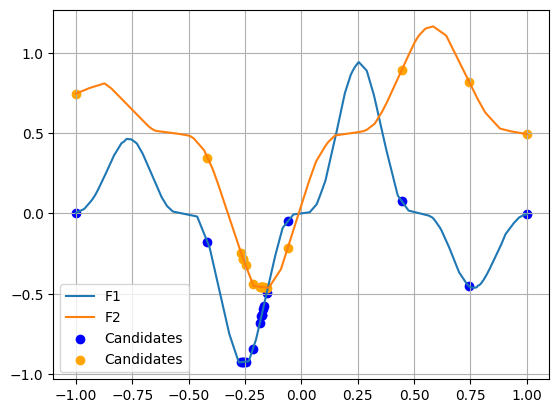

In [ ]:
# Run the Multi-objective Bayesian Optimization
# Step 1. Generate initial x with their observations of the two objectives.
#         You can start with three x randomly generated within [-1,1].
# Step 2. Iteratively run the Multi-objective Bayesian Optimization on current training data to find new candidate,
#         and add the new candidate to your training data.
# Step 3. Please plot all the candiates and their observations of the two objectives at each iteration.

# Hint: Note that we aim to minimize the objective functions instead of maximize.

# Below are what all the figures look like.
# After 15 iterations an optimal has been reached around x = -0.2, which is in fact a zone where both functions reach minimum.

### 5. Examining the Pareto front

In [ ]:
def plot_candidates(candidates):
    # COMPLETE
    plt.show()

In [ ]:
def generate_initial_data(n_samples):
    x_init = torch.tensor(bounds[0]) + torch.rand(n_samples, 1) * (torch.tensor(bounds[1]) - torch.tensor(bounds[0]))
    y_init = # COMPLETE
    return x_init, y_init

In [ ]:
n_iter = # COMPLETE
n_start = # COMPLETE

x, y = # COMPLETE - Call the right function with n_start as the argument to generate initial data

plot_candidates(torch.cat([x,y], dim=1))

# COMPLETE - Generates candidates and plot for 15 iterations

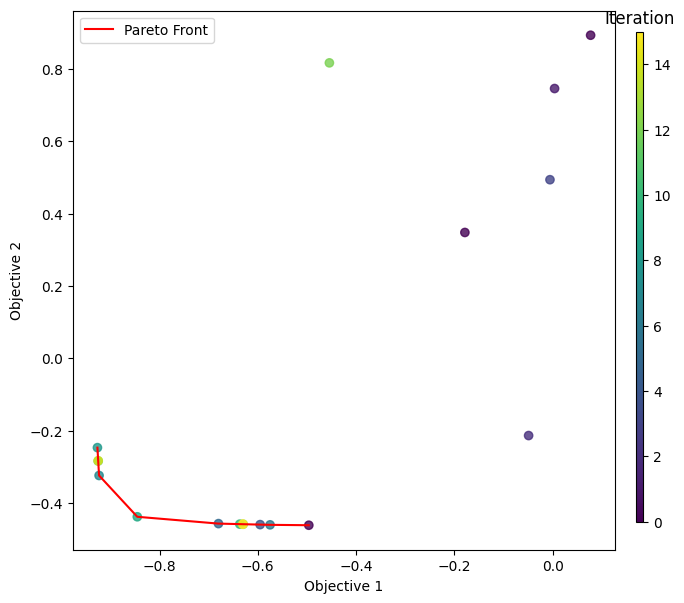

In [ ]:
# Plot the value of objective f1 and objective f2 of all candiates, and mark the pareto front.
# Below is what the figure looks like.
# from botorch.utils.multi_objective.pareto import is_non_dominated can be useful.

# COMPLETE